In [1]:
import rasterio

In [87]:
LS14B4 = rasterio.open(r'data\landsat2014_B4.TIF')
red14 = rasterio.open(r'data\landsat2014_B4.TIF').read(1)
profile = LS14B4.profile
LS14B4.close()

In [88]:
red14.shape

(7781, 7651)

In [15]:
temp = red14.squeeze()
temp.shape

(7781, 7651)

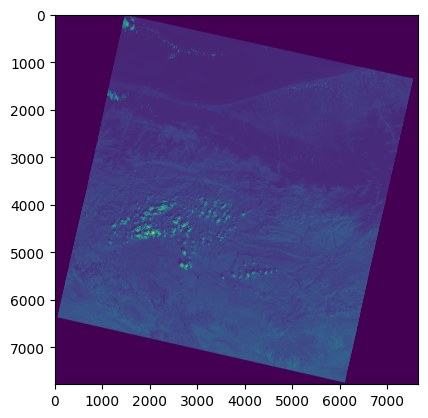

In [12]:
import matplotlib.pyplot as plt

plt.imshow(red14.squeeze())

In [23]:
with rasterio.open(r'data\landsat2014_B4.TIF') as src:
    red14 = src.read().astype('float32')
    profile = src.profile
with rasterio.open(r'data\landsat2014_B5.TIF') as src:
    nir14 = src.read().astype('float32')
with rasterio.open(r'data\landsat2024_B4.TIF') as src:
    red24 = src.read().astype('float32')
with rasterio.open(r'data\landsat2024_B5.TIF') as src:
    nir24 = src.read().astype('float32')


In [34]:
def calc_ndvi(red, nir):
    ndvi = (nir - red) / (nir + red + 1e-6)
    return ndvi
ndvi14 = calc_ndvi(red14, nir14)
ndvi24 = calc_ndvi(red24, nir24)

ndvi14.shape

(1, 7781, 7651)

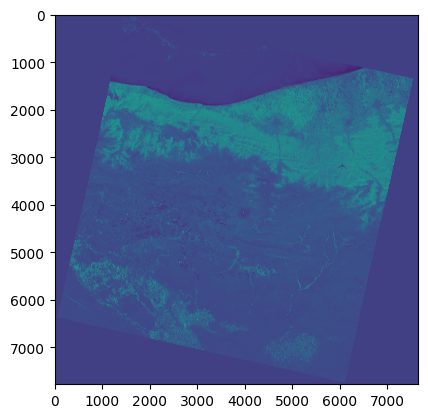

In [ ]:
plt.imshow(ndvi14.squeeze())

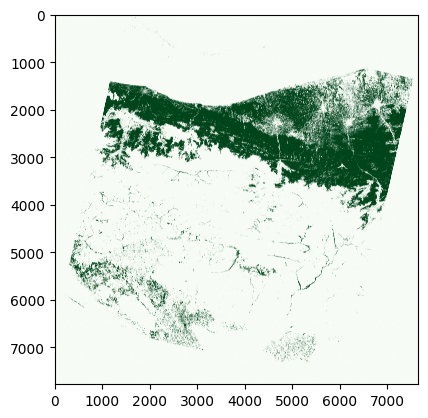

In [26]:
green14 = ndvi14 > 0.2

plt.imshow(green14.squeeze(), cmap='Greens')

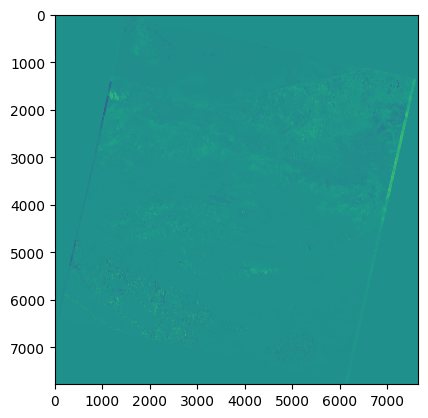

In [29]:
green14 = ndvi14 > 0.2
green24 = ndvi24 > 0.2

change = ndvi24 - ndvi14

plt.imshow(change.squeeze())

In [33]:
with rasterio.open('output/green14.tif', 'w', **profile) as dst:
    dst.write(green14)
with rasterio.open('output/green24.tif', 'w', **profile) as dst:
    dst.write(green24)

In [41]:
with rasterio.open('output/ndvi14.tif', 'w', **profile) as dst:
    dst.write(ndvi14)
with rasterio.open('output/ndvi24.tif', 'w', **profile) as dst:
    dst.write(ndvi24)

In [ ]:
from rasterstats import zonal_stats
import geopandas as gpd

gdf = gpd.read_file(r'data\tehran_mahallat.shp')

if profile['crs'] != gdf.crs:
    gdf.to_crs = profile['crs']



True

In [ ]:
ndvi14_stats = zonal_stats(gdf, r'output\ndvi14.tif', band=1)
# Error


In [64]:
green14_stats = zonal_stats(gdf, r'output\green14.tif', categorical=True)
green24_stats = zonal_stats(gdf, r'output\green24.tif', categorical=True)


In [57]:
len(green14_stats)

355

In [59]:
green14_stats

[{1: 200},
 {},
 {1: 47},
 {1: 76},
 {1: 85},
 {1: 89},
 {1: 127},
 {1: 15},
 {1: 226},
 {1: 7},
 {1: 197},
 {1: 216},
 {1: 278},
 {1: 538},
 {1: 115},
 {1: 208},
 {1: 317},
 {1: 90},
 {1: 73},
 {1: 3},
 {1: 10},
 {1: 1},
 {1: 18},
 {1: 242},
 {1: 163},
 {1: 2},
 {1: 34},
 {1: 140},
 {1: 13},
 {1: 423},
 {1: 80},
 {1: 180},
 {1: 45},
 {1: 747},
 {1: 135},
 {1: 197},
 {1: 72},
 {1: 330},
 {1: 435},
 {1: 207},
 {1: 42},
 {1: 1},
 {1: 15},
 {1: 62},
 {1: 20},
 {1: 82},
 {1: 36},
 {1: 374},
 {1: 76},
 {1: 5},
 {1: 19},
 {1: 60},
 {1: 75},
 {1: 11},
 {1: 196},
 {1: 61},
 {1: 33},
 {1: 106},
 {1: 66},
 {1: 34},
 {1: 11},
 {1: 28},
 {},
 {1: 1},
 {},
 {1: 1},
 {},
 {1: 4},
 {1: 5},
 {1: 7},
 {1: 1},
 {1: 1},
 {1: 24},
 {1: 908},
 {1: 167},
 {1: 903},
 {1: 57},
 {1: 92},
 {1: 5},
 {1: 105},
 {1: 402},
 {1: 72},
 {1: 62},
 {1: 552},
 {1: 51},
 {},
 {},
 {1: 5},
 {},
 {1: 8},
 {1: 86},
 {1: 37},
 {1: 22},
 {1: 164},
 {1: 43},
 {1: 2},
 {1: 1},
 {},
 {},
 {1: 36},
 {1: 4},
 {},
 {},
 {1: 4},
 {},

In [58]:
len(gdf)

355

In [60]:
green_count14= []
for s in green14_stats:
    count = s.get(1,0)
    green_count14.append(count) 
gdf['green14_count']= green_count14

In [65]:
gdf['green24_count'] = [s.get(1,0) for s in green24_stats]

In [67]:
gdf['green_change1424']= gdf['green24_count']-gdf['green14_count']

In [68]:
gdf.head()

,OBJECTID_1,OBJECTID,REGION,NAME_FINAL,CODE,OLD_CODE,NAME_REGIO,AREA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry,green14_count,green24_count,green_change1424
0,9,9,1,ولنجک,103,5721463,ولنجک1,2.524723e+06,7592.723714,0.0,0.0,"POLYGON Z ((537247.888 3961582.982 0, 537217.2...",200,288,88
1,10,10,1,کوهسار,127,None,کوهسار1,1.236379e+05,1831.716266,0.0,0.0,"POLYGON Z ((534134.774 3962700.196 0, 534197.8...",0,6,6
2,11,11,2,پرواز,202,5721016,پرواز2,1.209150e+06,5979.308674,0.0,0.0,"POLYGON Z ((532239.685 3961408.487 0, 532239.7...",47,72,25
3,12,12,2,دريا,210,5720988,دريا2,2.035612e+06,6522.726020,0.0,0.0,"POLYGON Z ((535332.43 3959209.444 0, 535331.29...",76,64,-12
4,13,13,2,درختي,209,5720995,درختي2,1.886177e+06,6271.865143,0.0,0.0,"POLYGON Z ((533161.979 3958141.654 0, 533044.0...",85,70,-15


<Axes: >

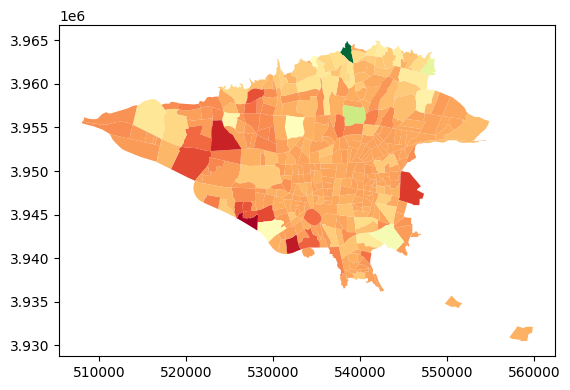

In [69]:
gdf.plot('green_change1424', cmap='RdYlGn')

In [73]:
profile['transform']

Affine(30.0, 0.0, 481185.0,
       0.0, -30.0, 4105515.0)

In [ ]:
abs(profile['transform'].a)


30.0

In [75]:
abs(profile['transform'].e)


30.0

In [76]:
pix_area = abs(profile['transform'].a) * abs(profile['transform'].e)

In [77]:
pix_area

900.0

In [78]:
gdf['green_area14']= gdf['green14_count'] * pix_area
gdf['green_area24']= gdf['green24_count'] * pix_area


In [85]:
gdf['green_area_change'] = gdf['green_area24']- gdf['green_area14']

In [86]:
gdf.head()

,OBJECTID_1,OBJECTID,REGION,NAME_FINAL,CODE,OLD_CODE,NAME_REGIO,AREA,SHAPE_LENG,SHAPE_AREA,SHAPE_LEN,geometry,green14_count,green24_count,green_change1424,green_area14,green_area24,green_area_change
0,9,9,1,ولنجک,103,5721463,ولنجک1,2.524723e+06,7592.723714,0.0,0.0,"POLYGON Z ((537247.888 3961582.982 0, 537217.2...",200,288,88,180000.0,259200.0,79200.0
1,10,10,1,کوهسار,127,None,کوهسار1,1.236379e+05,1831.716266,0.0,0.0,"POLYGON Z ((534134.774 3962700.196 0, 534197.8...",0,6,6,0.0,5400.0,5400.0
2,11,11,2,پرواز,202,5721016,پرواز2,1.209150e+06,5979.308674,0.0,0.0,"POLYGON Z ((532239.685 3961408.487 0, 532239.7...",47,72,25,42300.0,64800.0,22500.0
3,12,12,2,دريا,210,5720988,دريا2,2.035612e+06,6522.726020,0.0,0.0,"POLYGON Z ((535332.43 3959209.444 0, 535331.29...",76,64,-12,68400.0,57600.0,-10800.0
4,13,13,2,درختي,209,5720995,درختي2,1.886177e+06,6271.865143,0.0,0.0,"POLYGON Z ((533161.979 3958141.654 0, 533044.0...",85,70,-15,76500.0,63000.0,-13500.0
